In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
# basic generators!!!

def generate_multivariate_normal(size):
    mean = torch.tensor([1.0, 2.0])
    cov = torch.tensor([[2.0, 0.5], [0.5, 1.0]])
    A = torch.linalg.cholesky(cov)
    z = torch.randn(*size, 2)
    samples = mean + z @ A.T
    return samples

def generate_normal(size):
    return torch.normal(mean=0, std=1e-7, size=size)

def generate_unif(size):
    return torch.rand(size=size)

def generate_Cauchy(size):
    cauchy = torch.distributions.Cauchy(loc=0.0, scale=100.0)
    tensor = cauchy.sample(size)
    return tensor

def generate_dirichlet(size):
    alpha = torch.tensor([0.5, 0.5, 0.5])
    dirichlet = torch.distributions.Dirichlet(alpha)
    tensor = dirichlet.sample(size)
    return tensor

def generate_Beta(size):
    beta = torch.distributions.Beta(concentration0=0.5, concentration1=0.5)
    tensor = beta.sample(size)
    return tensor

def generate_poisson(size):
    rates = torch.full(size, 4.0)
    tensor = torch.poisson(rates)
    return tensor

def generate_LogNormal(size):
    lognormal = torch.distributions.LogNormal(loc=0.0, scale=1.0)
    tensor = lognormal.sample(size)
    return tensor


def generate_Gamma(size):
    gamma = torch.distributions.Gamma(concentration=2.0, rate=2.0)
    tensor = gamma.sample(size)
    return tensor


def generate_Exponential(size):
    exponential = torch.distributions.Exponential(rate=1.0)
    tensor = exponential.sample(size)
    return tensor


list_distr = {
    generate_multivariate_normal: 'DNormal',
    generate_normal: 'Normal',
    generate_unif: 'Unif',
    generate_Cauchy: 'Cauchy',
    generate_dirichlet: 'Dirichlet',
    generate_Beta: 'Beta',
    generate_poisson: 'Poisson',
    generate_LogNormal: 'LogNormal',
    generate_Gamma: 'Gamma',
    generate_Exponential: 'Exponential'
}

In [4]:
def plot_hist(tensor):
    input_np = tensor.numpy().flatten()
    plt.figure(figsize=(10, 6))
    plt.hist(input_np, bins=50, color='blue', alpha=0.7, edgecolor='black')
    plt.title("Histogram of Tensor Values")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [5]:
def test_fault(size, fault, fault_value, numFaults):
    for function, name in list_distr.items():
        input = function(size)
        if fault:
            for _ in range(numFaults):
                x, y = torch.randint(0, input.shape[0], size=(1,)).item(), torch.randint(0, input.shape[0], size=(1,)).item()
                input[x,y] = fault_value
        conv = input.view(-1,1024).abs().mean(0)
        std, mean, n = torch.std(conv).item(), torch.mean(conv).item(), 1024
        alpha3 = pow(conv - mean, 3).sum() / n / pow(std, 3)
        K = pow(6 * (n - 2) / (n + 1) / (n + 3), 1/2)
        print(f'Test for {name} ...')
        k = 1
        if alpha3 > k * K:
            print('[FAULT DETECTED]')
        else:
            print('[NO FAULT DETECTED]')
        print(f'std: {K}, alpha3: {abs(alpha3)}, bound for {k} std: {k * K}')

In [6]:
print('Results without fault...')
test_fault((1024, 4096), False, None, None)

Results without fault...
Test for DNormal ...
[NO FAULT DETECTED]
std: 0.07632273391435787, alpha3: 0.00030008662724867463, bound for 1 std: 0.07632273391435787
Test for Normal ...
[FAULT DETECTED]
std: 0.07632273391435787, alpha3: 0.08305168151855469, bound for 1 std: 0.07632273391435787
Test for Unif ...
[FAULT DETECTED]
std: 0.07632273391435787, alpha3: 0.12118075788021088, bound for 1 std: 0.07632273391435787
Test for Cauchy ...
[FAULT DETECTED]
std: 0.07632273391435787, alpha3: 30.225173950195312, bound for 1 std: 0.07632273391435787
Test for Dirichlet ...
[FAULT DETECTED]
std: 0.07632273391435787, alpha3: 0.07790098339319229, bound for 1 std: 0.07632273391435787
Test for Beta ...
[NO FAULT DETECTED]
std: 0.07632273391435787, alpha3: 0.03658442199230194, bound for 1 std: 0.07632273391435787
Test for Poisson ...
[NO FAULT DETECTED]
std: 0.07632273391435787, alpha3: 0.0664176419377327, bound for 1 std: 0.07632273391435787
Test for LogNormal ...
[FAULT DETECTED]
std: 0.07632273391435

In [ ]:
print('Results with fault...')

size = (1024, 4096)
rate = 0.1
numFaults = int(size[0] * size[1] * rate)
test_fault(size, True, 1e8, numFaults)

shape of input: torch.Size([1024, 2048])


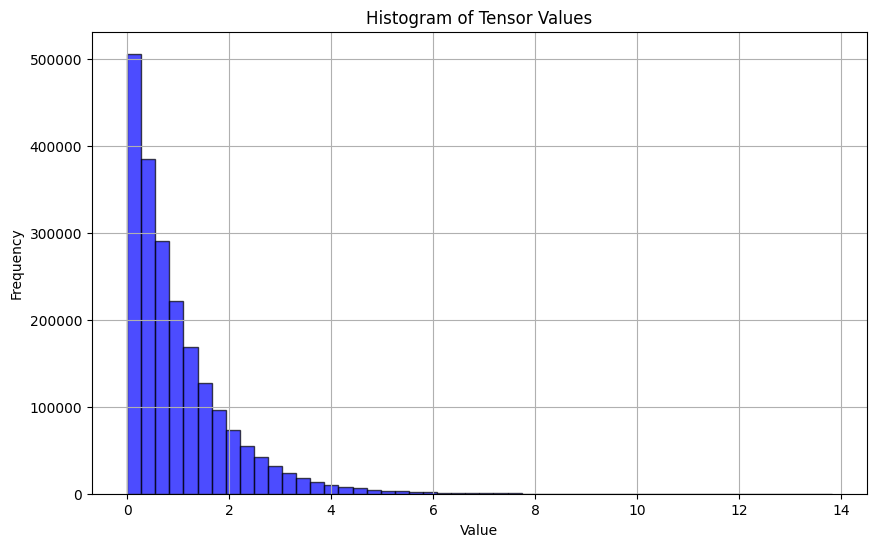

In [124]:
# input = generate_multivariate_normal(size=(1024, 2048))
# input = generate_normal(size=(1024, 2048))
# input = generate_unif(size=(2048, 4096))
# input = generate_Cauchy(size=(1024, 2048))
# input = generate_dirichlet(size=(1024, 2048))
# input = generate_Beta(size=(1024, 2048))
# input = generate_poisson(size=(1024, 2048))
# input = generate_LogNormal(size=(1024, 2048))
# input = generate_Gamma(size=(1024, 2048))
input_ = generate_Exponential(size=(1024, 2048))


print(f'shape of input: {input_.shape}')
plot_hist(input_)

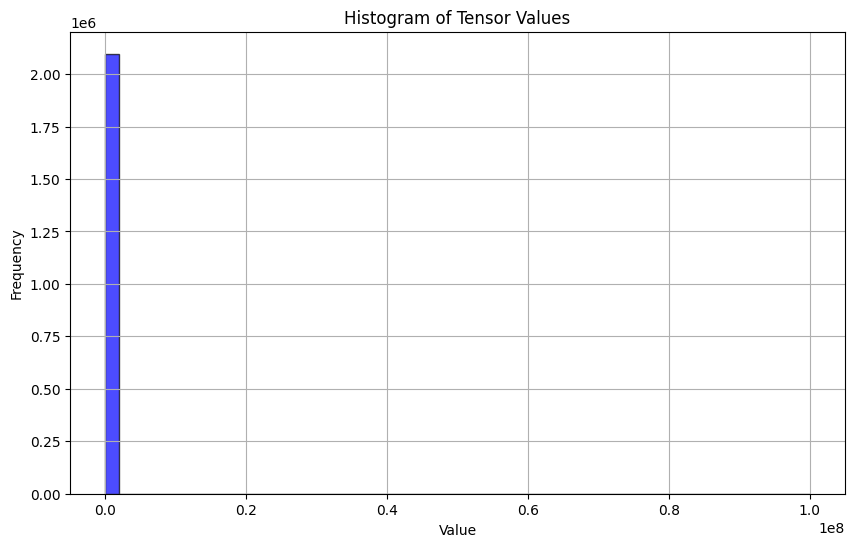

In [147]:
def fault_foo(input, numFaults, fault_value):
    result = input.clone()
    for _ in range(numFaults):
        x, y = torch.randint(0, input.shape[0], size=(1,)).item(), torch.randint(0, input.shape[0], size=(1,)).item()
        result[x,y] = torch.normal(mean=fault_value, std=1, size=(1,)).item()
    return result

size = (1024, 4096)
rate = 0.01
numFaults = int(size[0] * size[1] * rate)
numFaults = 1 
input = fault_foo(input_, numFaults, 1e8)
# input = input_
plot_hist(input)

shape of conv: torch.Size([1024])


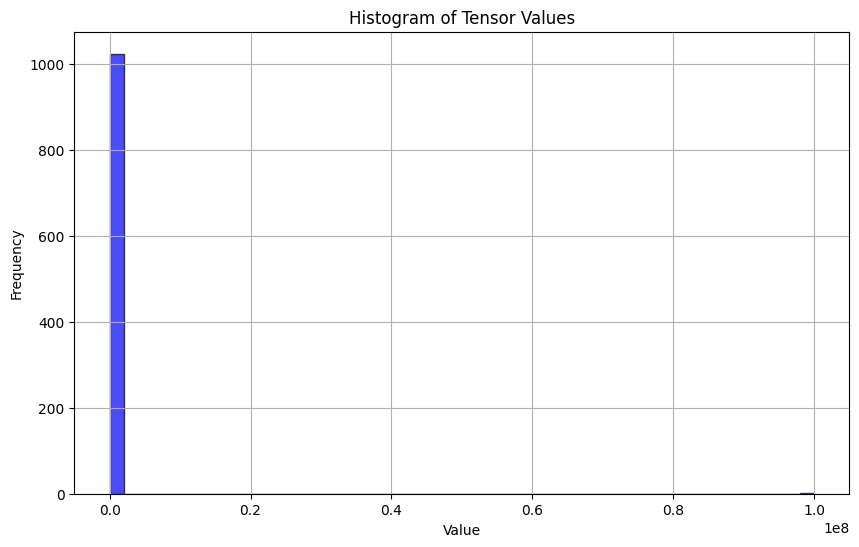

In [148]:
conv = input.view(-1,1024).abs().sum(0)
# conv = input.view(-1,1024).pow(2).amax(0)


print(f'shape of conv: {conv.shape}')
plot_hist(conv)

In [149]:
# http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%B0%D1%81%D0%B8%D0%BC%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%B8_%D0%B8_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0

print('Info about mean, mode and median')
print(f'mean: {torch.mean(conv)}, mode: {torch.mode(conv).values}, median: {torch.median(conv)}')

std, mean, n = torch.std(conv).item(), torch.mean(conv).item(), conv.shape[0]
alpha3 = pow(conv - mean, 3).sum() / n / pow(std, 3)
alpha4 = pow(conv - mean, 4).sum() / n / pow(std, 4)

K_3 = pow(6 * (n - 2) / (n + 1) / (n + 3), 1/2)
K_4 = pow(24 * n * (n - 2) * (n - 3) / (n + 1) / (n + 3) / (n + 5), 1/2)

print('\n\nInfo about skewness test')
k = 3
print(f'Results for moment 3: std: {K_3}, alpha3: {abs(alpha3)}, bound for {k} std: {k * K_3}')
print(f'Results for moment 4: std: {K_4}, alpha4: {abs(alpha4)}, bound for {k} std: {k * K_4}')
# if alpha3 > k * K:
#     print('[FAULT DETECTED]')
# else:
#     print('[NO FAULT DETECTED]')
# print(f'std: {K}, alpha3: {abs(alpha3)}, bound for {k} std: {k * K}')

Info about mean, mode and median
mean: 99702.671875, mode: 2010.472412109375, median: 2046.4244384765625


Info about skewness test
Results for moment 3: std: 0.07632273391435787, alpha3: 31.906312942504883, bound for 3 std: 0.2289682017430736
Results for moment 4: std: 4.865629951895405, alpha4: 1020.0057983398438, bound for 3 std: 14.596889855686216


In [87]:
from scipy.stats import gaussian_kde
from diptest import diptest


def unimTest(data):
    dip_value, p_value = diptest(data.numpy())
    print(f"Hartigan's Dip Test: Dip = {dip_value}, p-value = {p_value}")

    if p_value < 0.05:
        print("Распределение мультимодальное.")
    else:
        print("Распределение унимодальное.")


unimTest(conv)

Hartigan's Dip Test: Dip = 0.18657995518614126, p-value = 0.0
Распределение мультимодальное.
